In [143]:
from collections import defaultdict
from collections import OrderedDict
import json

descriptors = ['nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20','nlay-3_rc-f_nbf-32_ws-f_str-20','nlay-3_rc-f_nbf-16_ws-f_str-20']
descrip_simple = ['16 filters/layer, RC Model', '32 filters/layer, No RC Model','16 filters/layer, No RC Model']
prefixes = [5,10,20,40,60,80]
descriptors_to_prefix_to_perf = defaultdict(lambda: defaultdict(list))
db_records = json.loads(open('chr1_Ctcf/subsets/runs_perf-metric-auROC.db').read())['records']
db_records += json.loads(open('chr1_Ctcf/runs_perf-metric-auROC.db').read())['records']
for prefix in prefixes:
    for record in db_records:
        message = record['message']
        for descriptor in descriptors:
            passes=False
            if (prefix==100):
                if ('chr1x2' in message and descriptor in message):
                    passes=True
            else:
                if (str(int(prefix))+"pc/ " in message and descriptor in message):
                    print(message, record['best_valid_perf_info']['valid_all_stats']['mean_auROC'])
                    passes=True
            if (passes):
                descriptors_to_prefix_to_perf[descriptor][prefix].append(record)
    #for descriptor in descriptors_to_prefix_to_perf:
    #    print(len(descriptors_to_prefix_to_perf[descriptor][prefix]), )

(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-0', 0.9227396979767399)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-5', 0.9131302281248053)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-8', 0.9054433956449484)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-2', 0.9046807795774262)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-9', 0.9034525344510633)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-6', 0.8865062209151463)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-4', 0.8752347959505926)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-3', 0.8185187536449791)
(u'chr1Ctcf-5pc/ nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-7', 0.8009357303278507)
(u'chr1Ctcf-5pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-7', 0.8007582579242786)
(u'chr1Ctcf-5pc/ nlay-3_rc-f_nbf-32_ws-f_str-20 seed-6', 0.7842918711463817)
(u'chr1Ct

In [144]:
auroc_per_group = OrderedDict([(key, [list(set([y['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for y in
                                      descriptors_to_prefix_to_perf[key][x]])) for x in prefixes]) for key in descriptors])
auprc_per_group = OrderedDict([(key, [list(set([y['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for y in
                                      descriptors_to_prefix_to_perf[key][x]])) for x in prefixes]) for key in descriptors])

In [145]:
auroc_per_group

OrderedDict([('nlay-3_rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20',
              [[0.9034525344510633,
                0.9131302281248053,
                0.9046807795774262,
                0.8865062209151463,
                0.9054433956449484,
                0.8185187536449791,
                0.8752347959505926,
                0.6978539802532844,
                0.9227396979767399,
                0.8009357303278507],
               [0.9348254427930569,
                0.9298798155467006,
                0.9081195433971749,
                0.9394987450868131,
                0.9325263452315757,
                0.9378244982795758,
                0.9344400735833941,
                0.9297186861802924,
                0.9331125902313635,
                0.9354487202103898],
               [0.9448817403277443,
                0.9465828125293156,
                0.9411932289400693,
                0.9456677794485305,
                0.947355753620317,
                0.9456255353524674,

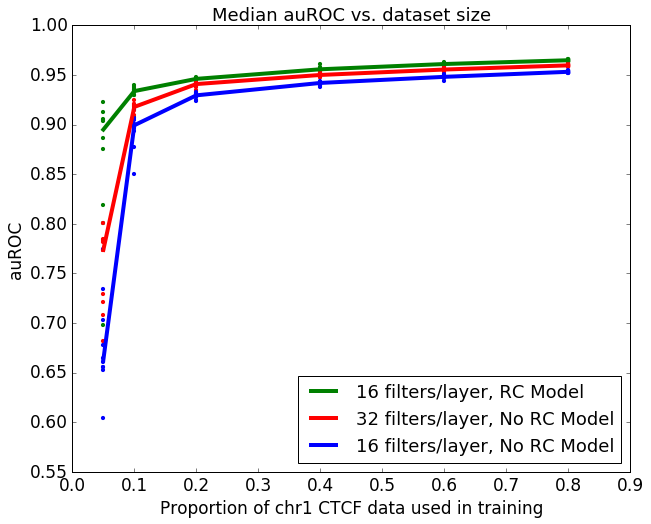

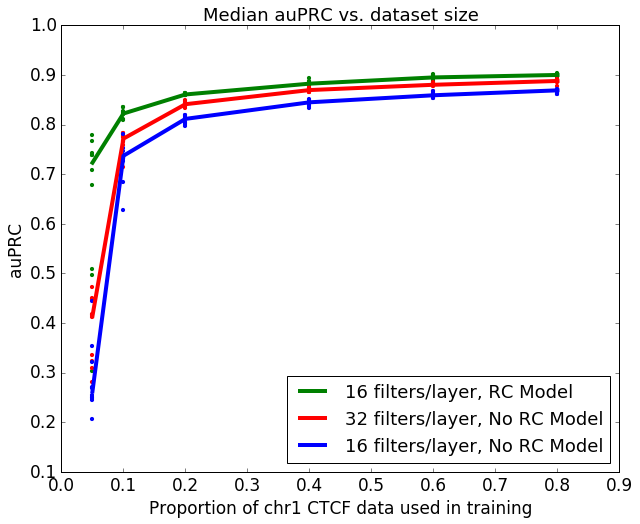

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for group,groupname in [(auroc_per_group, 'auROC'), (auprc_per_group, 'auPRC')]:
    plt.figure(figsize=(10,8))
    handles = []
    for key,color in zip(group.keys(), ['g','r','b']):
        medians = np.array([np.median(x) for x in group[key]])
        mins = np.abs(np.array([np.min(x) for x in group[key]]) - medians)
        maxs = np.array([np.max(x) for x in group[key]]) - medians
        handles.append(plt.errorbar(np.array(prefixes)/100.0, medians, 
                                    linewidth=4, color=color))
        for idx,xpoint in enumerate(np.array(prefixes)/100.0):
            plt.scatter([xpoint for y in group[key][idx]],
                        group[key][idx],
                        color=color, s=10)
        
    plt.xlim(0)
    plt.xlabel("Proportion of chr1 CTCF data used in training", fontsize=17)
    plt.ylabel(groupname, fontsize=17)
    plt.tick_params(labelsize=17)
    plt.title("Median "+groupname+" vs. dataset size", fontsize=18)
    plt.legend(handles, labels=descrip_simple, loc=4, fontsize=18)
    plt.savefig(groupname+"_vs_data_proportion.pdf", format="pdf")
    plt.show()
